## Load Data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data.tsv", sep='\t', index_col=0)
PC_data = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data_PC3.tsv", sep='\t', index_col=0)
DU_data = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data_DU145.tsv", sep='\t', index_col=0)

In [ ]:
PC_data.head(5)

,og_df_idx,sample,cell_line,response,ID,CD9,SYPL1,NME1,PSMA4,ASNS,...,HSBP1,MSMP,AC010970.2,TMX1,EIF1,NEAT1,CXCL2,MTATP6P1,MAL2,B2M
0,0,GSM4161769,PC3,Res,84,-0.517198,-0.632057,-1.189322,-0.647247,-1.472626,...,0.461659,-1.179807,0.907275,-0.622409,0.512588,1.659146,-0.462996,0.883241,0.042648,0.888186
1,2,GSM4161715,PC3,Res,30,0.855890,0.796209,-0.246952,0.683444,1.172218,...,0.801054,0.910677,0.015436,0.700068,1.099030,0.430106,0.010919,1.010342,0.570048,0.790960
2,4,GSM4161745,PC3,Res,60,1.232866,0.523105,0.267647,-0.082364,-1.311988,...,1.321535,0.834046,-0.269744,0.238691,0.897919,0.096618,-0.462996,0.030137,1.124056,1.532183
3,7,GSM4161616,PC3,Sen,21,-1.602350,-3.108739,1.229018,0.841351,-1.747239,...,-0.970160,-0.221637,1.559325,-1.981431,0.278917,0.970147,-0.462996,1.675328,0.470497,-0.775891
4,8,GSM4161684,PC3,Sen,89,-3.162352,0.178384,0.875522,0.379513,-1.747239,...,-0.113371,0.042360,1.375198,-0.473401,0.819504,0.344814,-0.462996,0.132832,-0.400630,0.254669


In [ ]:
PC_data.shape

(180, 307)

In [ ]:
DU_data.head(5)

,og_df_idx,sample,cell_line,response,ID,CYP51A1,MGST1,VDAC3,STRAP,PSMA4,...,LAPTM4B,TMX1,ADAM9,EIF1,NCEH1,NEAT1,SNHG1,B2M,OAZ1,PSMB3
0,1,GSM4161578,DU145,Res,55,1.095660,0.962989,-0.390678,-0.020920,0.542339,...,0.445006,0.167306,0.436825,0.657008,0.465230,0.749750,-0.346104,0.949318,0.188539,0.288163
1,3,GSM4161499,DU145,Sen,48,-1.367556,-1.892345,-3.802103,-1.391733,-2.446313,...,-2.624757,-1.986447,-3.263612,-1.208059,-1.360966,-2.241855,0.431866,-0.979595,-2.047853,-2.927521
2,5,GSM4161557,DU145,Res,34,1.026333,0.476668,0.146564,-0.010736,0.473771,...,0.028082,0.607048,0.557547,0.249777,-0.030007,-0.160165,-3.308772,0.388580,0.718945,0.431462
3,6,GSM4161538,DU145,Res,15,0.928410,0.566203,0.109865,0.075118,0.471016,...,0.127551,-0.229411,0.458631,0.183447,0.086968,-0.330964,-0.207033,0.531295,-0.057859,0.220060
4,9,GSM4161457,DU145,Sen,6,-1.922705,-1.395724,-1.178172,-0.656984,-1.180434,...,-1.243050,-1.259246,-1.685750,-1.623156,-0.972156,-1.164160,-0.983181,-2.002477,-2.040096,-1.258305


In [ ]:
DU_data.shape

(144, 307)

#### Load selected genes

In [ ]:
####### just run this code to retrieve selected genes from txt file ######### 
with open('/content/gdrive/MyDrive/BST281_FinalProject/Jiazi_selectedgenes.txt') as txt:
  lines = txt.readlines()
  genes = [line.rstrip().split() for line in lines]

genes_Jiazi = [gene[0] for gene in genes]
#genes_selected = [gene[0].replace('.','|',2).replace('|','.',1) for gene in genes]

with open('/content/gdrive/MyDrive/BST281_FinalProject/Marie_selectedgenes.txt') as txt:
  lines = txt.readlines()
  genes = [line.rstrip().split() for line in lines]

genes_Marie = [gene[0] for gene in genes]

In [24]:
#for i in range(len(genes_selected)):
  #if genes_selected[i] == 'ENSG00000211459.2|MT.RNR1':
    #genes_selected[i] = 'ENSG00000211459.2|MT-RNR1'
print(len(genes_Jiazi))
print(len(genes_Marie))

37
11


## Classification of Cell Line - PC & DU


too few data point (i.e., 180 sample) so only do train-validation split; no independent testing

#### train_validation split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def train_val(data,genes_selected):

  X = data[genes_selected]
  Y = data['response']
  X, Y = shuffle(X, Y, random_state=1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
  Y_train[Y_train == 'Sen'] = 1
  Y_train[Y_train == 'Res'] = 0
  Y_test[Y_test == 'Sen'] = 1
  Y_test[Y_test == 'Res'] = 0

  X_train, X_test = np.array(X_train).astype('float32'), np.array(X_test).astype('float32')
  Y_train, Y_test = np.array(Y_train).astype('int32'), np.array(Y_test).astype('int32')

  return X_train, X_test, Y_train, Y_test

In [ ]:
pc_X_train_J, pc_X_test_J, pc_Y_train_J, pc_Y_test_J = train_val(PC_data, genes_Jiazi)
du_X_train_J, du_X_test_J, du_Y_train_J, du_Y_test_J = train_val(DU_data, genes_Jiazi)
pc_X_train_M, pc_X_test_M, pc_Y_train_M, pc_Y_test_M = train_val(PC_data, genes_Marie)
du_X_train_M, du_X_test_M, du_Y_train_M, du_Y_test_M = train_val(DU_data, genes_Marie)

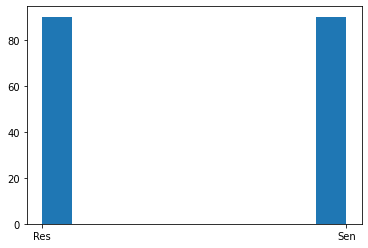

In [ ]:
from matplotlib import pyplot as plt 
plt.hist(PC_data['response'])
plt.show()

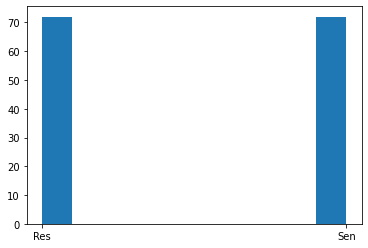

In [ ]:
plt.hist(DU_data['response'])
plt.show()

#### Model training

In [ ]:
import tensorflow
from tensorflow.keras.metrics import AUC
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

def train_model(train_X, train_Y, test_X, test_Y, BATCH, EPOCH, seed):

  tensorflow.keras.utils.set_random_seed(seed)
  num_features = train_X.shape[1]

  model = Sequential()
  model.add(Dense(units=64, activation='relu', input_dim=num_features, name='hidden_layer1'))
  model.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer2'))
  model.add(Dense(units=8, activation='relu', input_dim=num_features, name='hidden_layer3'))
  model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 
  opt = SGD(learning_rate=0.1)

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  # model.summary()
  result = model.fit(x=train_X, y=train_Y, validation_data=[test_X, test_Y], batch_size=BATCH,epochs=EPOCH, verbose=0)
  val_pred = model.predict(test_X)

  return result,val_pred

In [ ]:
result, val_pred = train_model(pc_X_train_J, pc_Y_train_J, pc_X_test_J, pc_Y_test_J, 32, 10,1)
result

#### training for multiple iterations

In [ ]:
def train_process(train_X, train_Y, test_X, test_Y, BATCH, EPOCH):
  
  acc = []
  valacc = []
  np.random.seed(1111)
  seed = np.random.choice(1000,10)
  
  for i in seed:
    init = 0
    result, val_pred = train_model(train_X, train_Y, test_X, test_Y, BATCH, EPOCH, int(i))
    best_acc = result.history['accuracy'][-1]
    best_valacc = result.history['val_accuracy'][-1]
    acc.append(best_acc)
    valacc.append(best_valacc)
    acc_mean = np.mean(best_acc)
    valacc_mean = np.mean(best_valacc)
    acc_std = np.std(acc)
    valacc_std = np.std(valacc)

    if best_valacc > init:
      result_best = result
      val_best = val_pred
  
  return acc_mean, valacc_mean, acc_std, valacc_std, val_best, result_best

In [ ]:
acc_pc_J, valacc_pc_J, std_pc_J, valstd_pc_J, val_pred_pc_J, result_pc_J = train_process(pc_X_train_J, pc_Y_train_J, pc_X_test_J, pc_Y_test_J, 32, 10)
acc_du_J, valacc_du_J, std_du_J, valstd_du_J, val_pred_du_J, result_du_J = train_process(du_X_train_J, du_Y_train_J, du_X_test_J, du_Y_test_J, 32, 10)
acc_pc_M, valacc_pc_M, std_pc_M, valstd_pc_M, val_pred_pc_M, result_pc_M = train_process(pc_X_train_M, pc_Y_train_M, pc_X_test_M, pc_Y_test_M, 32, 10)
acc_du_M, valacc_du_M, std_du_M, valstd_du_M, val_pred_du_M, result_du_M = train_process(du_X_train_M, du_Y_train_M, du_X_test_M, du_Y_test_M, 32, 10)

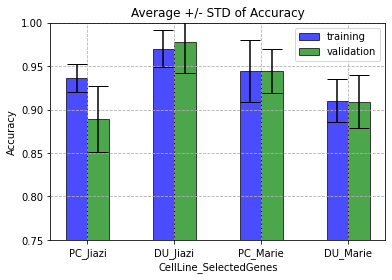

In [ ]:
acc = [acc_pc_J, acc_du_J, acc_pc_M, acc_du_M]
valacc = [valacc_pc_J, valacc_du_J, valacc_pc_M, valacc_du_M]
acc_std = [std_pc_J, std_du_J, std_pc_M, std_du_M]
valacc_std = [valstd_pc_J, valstd_du_J, valstd_pc_M, valstd_du_M]

n=4
r = np.arange(n)
width = 0.25 
plt.bar(r, acc, yerr=acc_std, color = 'b', width = width, edgecolor = 'black',label='training', align='center',capsize=10, alpha=0.7)
plt.bar(r + width, valacc, yerr=valacc_std, color = 'g', width = width, edgecolor = 'black', label='validation',capsize=10, alpha=0.7)

plt.xlabel("CellLine_SelectedGenes")
plt.ylabel("Accuracy")
plt.ylim(0.75,1)
plt.grid(linestyle='--')
plt.xticks(r + width/2,['PC_Jiazi','DU_Jiazi','PC_Marie','DU_Marie'])
plt.legend()
plt.title('Average +/- STD of Accuracy')
plt.show()

In [ ]:
print(acc)
print(acc_std)
print(valacc)
print(valacc_std)

[0.9365079402923584, 0.9700000286102295, 0.9444444179534912, 0.9100000262260437]
[0.01587300598621788, 0.02154066524970329, 0.03592529545336904, 0.02457642536629049]
[0.8888888955116272, 0.9772727489471436, 0.9444444179534912, 0.9090909361839294]
[0.03777050818325906, 0.03520895210267653, 0.024914125464579617, 0.0308287617052378]


#### AUC & ROC

In [ ]:
def AUC_generate(Y_test, val_pred):
  m1 = AUC()
  m1.update_state(Y_test, val_pred)

  Y_test = Y_test.reshape([len(Y_test),1])
  val_pred = val_pred.reshape([len(val_pred),1])
  Y_test = np.concatenate((Y_test, 1-Y_test), 1)
  val_pred = np.concatenate((val_pred, 1-val_pred), 1)

  return m1.result().numpy(), Y_test, val_pred

In [ ]:
AUC_pc_J, Y_test1, val_pred1 = AUC_generate(pc_Y_test_J, val_pred_pc_J) 
AUC_du_J, Y_test2, val_pred2 = AUC_generate(du_Y_test_J, val_pred_du_J) 
AUC_pc_M, Y_test3, val_pred3 = AUC_generate(pc_Y_test_M, val_pred_pc_M)
AUC_du_M, Y_test4, val_pred4 = AUC_generate(du_Y_test_M, val_pred_du_M)
print(AUC_pc_J)
print(AUC_du_J)
print(AUC_pc_M)
print(AUC_du_M)

0.9756945
0.9956427
0.9666667
0.98257077


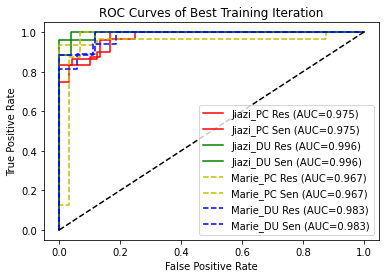

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
new_lab = ['Res','Sen']
for i,j in zip(range(n_classes),new_lab):
    fpr[i], tpr[i], _ = roc_curve(Y_test1[:, i], val_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], 'r-', label='Jiazi_PC {0} (AUC={1:0.3f})' 
            ''.format(j, roc_auc[i]))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i,j in zip(range(n_classes),new_lab):
    fpr[i], tpr[i], _ = roc_curve(Y_test2[:, i], val_pred2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], 'g-', label='Jiazi_DU {0} (AUC={1:0.3f})' 
            ''.format(j, roc_auc[i]))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i,j in zip(range(n_classes),new_lab):
    fpr[i], tpr[i], _ = roc_curve(Y_test3[:, i], val_pred3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], 'y--', label='Marie_PC {0} (AUC={1:0.3f})' 
            ''.format(j, roc_auc[i]))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i,j in zip(range(n_classes),new_lab):
    fpr[i], tpr[i], _ = roc_curve(Y_test4[:, i], val_pred4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i],'b--', label='Marie_DU {0} (AUC={1:0.3f})' 
            ''.format(j, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title("ROC Curves of Best Training Iteration")
plt.show()

#### Plot learning curve -- accuracy

In [ ]:
def plot_learning_curve_keras(hist_a, hist_b, hist_c, hist_d, epoch,metric1,metric2):
  loss_a = hist_a.history[metric1]
  loss_val_a = hist_a.history[metric2]
  loss_b = hist_b.history[metric1]
  loss_val_b = hist_b.history[metric2]
  loss_c = hist_c.history[metric1]
  loss_val_c = hist_c.history[metric2]
  loss_d = hist_d.history[metric1]
  loss_val_d = hist_d.history[metric2]

  plt.plot(range(epoch), loss_a, 'r-')
  plt.plot(range(epoch), loss_val_a, 'r--')
  plt.plot(range(epoch), loss_b, 'g-')
  plt.plot(range(epoch), loss_val_b, 'g--')
  plt.plot(range(epoch), loss_c, 'b-')
  plt.plot(range(epoch), loss_val_c, 'b--')
  plt.plot(range(epoch), loss_d, 'y-')
  plt.plot(range(epoch), loss_val_d, 'y--')

  plt.xlabel('train epochs')
  plt.ylabel(metric1)
  plt.legend(['train_PC_Jiazi','validation_PC_Jiazi', 'train_DU_Jiazi','validation_DU_Jiazi','train_PC_Marie','validation_PC_Marie','train_DU_Marie','validation_DU_Marie'])
  plt.title("Accuracy Curves of Best Training Iteration")
  return plt.show()

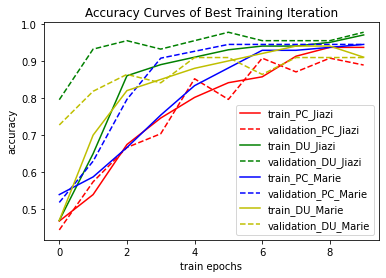

In [ ]:
plot_learning_curve_keras(result_pc_J,result_du_J, result_pc_M, result_du_M, 10,'accuracy','val_accuracy')